In [1]:
# import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
from IPython import display

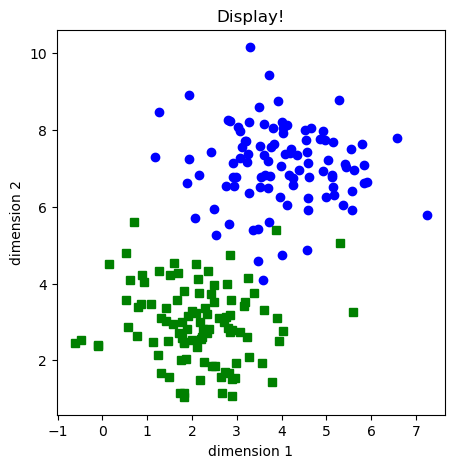

In [2]:
# create data

n_per_clust = 100
bias = 1

A = [  2, 3 ]
B = [  4, 7 ]

# generate data
a = [ A[0]+np.random.randn(n_per_clust)*bias , A[1]+np.random.randn(n_per_clust)*bias ]
b = [ B[0]+np.random.randn(n_per_clust)*bias , B[1]+np.random.randn(n_per_clust)*bias ]

# true labels
labels_np = np.vstack((np.zeros((n_per_clust,1)),np.ones((n_per_clust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'gs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'bo')
plt.title('Display!')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.show()

In [5]:
# build the model
def create_model(learning_rate):

    ANNclassify = nn.Sequential(
        nn.Linear(2,16),   
        nn.ReLU(),        
        nn.Linear(16,1),
        nn.ReLU(),
        nn.Linear(1,1),
        nn.Sigmoid()
    )

    # loss function
    loss_fun = nn.BCELoss()

    # optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learning_rate)
    
    return ANNclassify, loss_fun, optimizer

In [6]:
epochs = 1000

def train_model(ANNmodel):

  losses = torch.zeros(epochs)

  for i in range(epochs):

    # forward pass
    y_hat = ANNmodel(data)

    # compute loss
    loss = loss_fun(y_hat,labels)
    losses[i] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  predictions = ANNmodel(data)
  total_acc = 100 * torch.mean(((predictions > .5) == labels).float())
  
  return losses, predictions, total_acc

Final accuracy: 98.0)


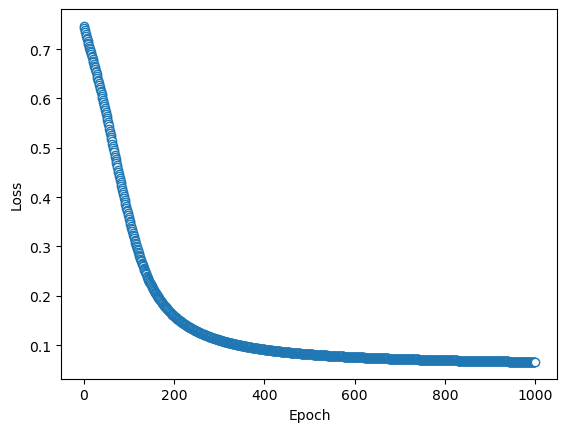

In [7]:
ANNclassify, loss_fun, optimizer = create_model(0.1)
losses, predictions, total_acc = train_model(ANNclassify)

print(f"Final accuracy: {total_acc})")

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

In [8]:
learning_rates = np.linspace(.001, .1, 10)
acc_by_lr = []
all_losses = np.zeros((len(learning_rates), epochs))

for i, lr in enumerate(learning_rates):
    ANNclassify, loss_fun, optimizer = create_model(lr)
    losses, predictions, total_acc = train_model(ANNclassify)

    acc_by_lr.append(total_acc)
    all_losses[i,:] = losses.detach()

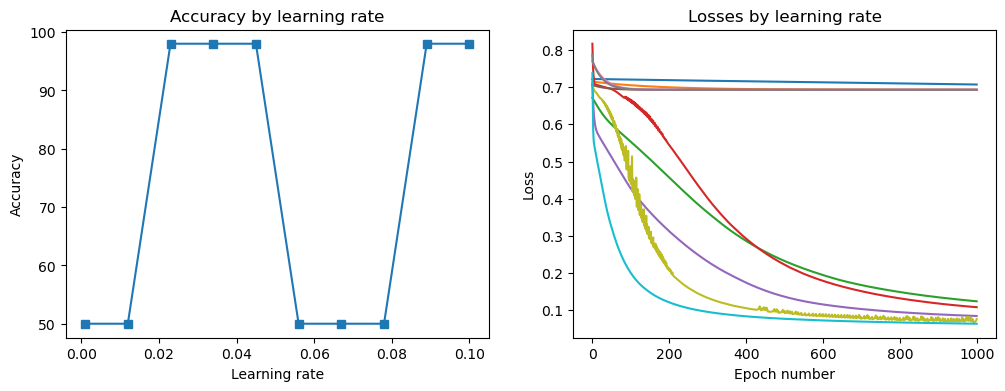

In [9]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learning_rates,acc_by_lr,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(all_losses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

In [10]:
# proportion of runs where the model had at least 70% accuracy
(sum(torch.tensor(acc_by_lr)>70)/len(acc_by_lr)).item()

0.5

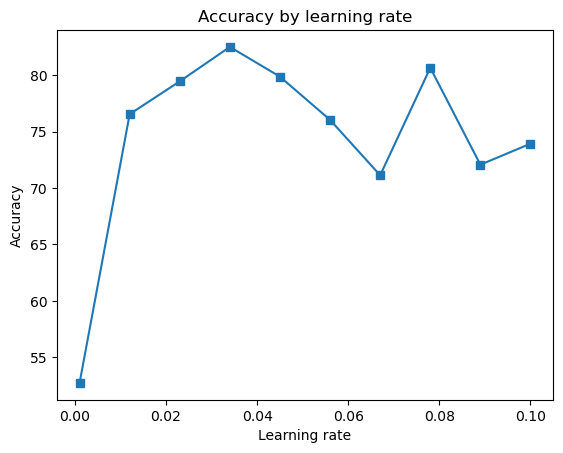

In [11]:
experiments = 50

# matrix to store all results
accMeta = np.zeros((experiments,len(learning_rates)))

# fewer epochs to reduce computation time
numepochs = 500

# now for the experiment
for expi in range(experiments):
  for i,lr in enumerate(learning_rates):
    
    # create and run the model
    ANNclassify,lossfun,optimizer = create_model(lr)
    losses,predictions,totalacc = train_model(ANNclassify)

    # store the results
    accMeta[expi,i] = totalacc

# now plot the results, averaged over experiments
plt.plot(learning_rates,np.mean(accMeta,axis=0),'s-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()

In [4]:
# other model features
learning_rate = .01

# loss function
lossfun = nn.BCELoss()

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learning_rate)


In [5]:
# train the model
epochs = 1000
losses = torch.zeros(epochs)

for i in range(epochs):

  # forward pass
  y_hat = ANNclassify(data)

  # compute loss
  loss = lossfun(y_hat,labels)
  losses[i] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

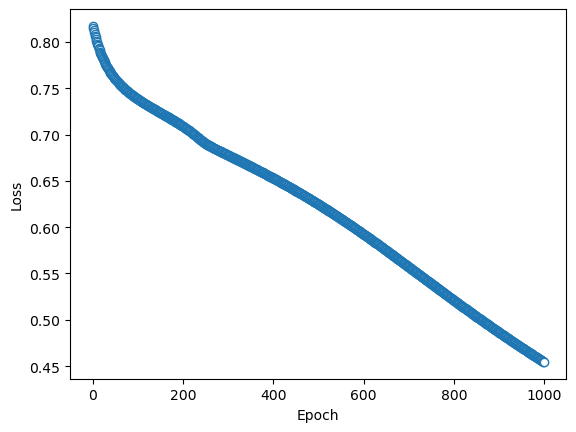

In [6]:
# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [7]:
# compute the predictions

# final forward pass
predictions = ANNclassify(data)

predlabels = predictions>.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
total_acc = 100-100*len(misclassified)/(2*n_per_clust)

print('Final accuracy: %g%%' %total_acc)


Final accuracy: 95.5%


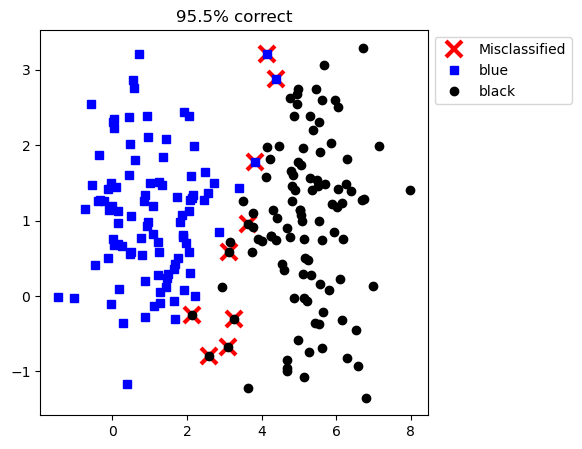

In [8]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{total_acc}% correct')
plt.show()